In [1]:
import numpy as np

### 최소제곱법

In [2]:
def sum_squares_error(y, t):
    return 0.5*np.sum((y-t)**2)

In [3]:
# 분류 결과
y=[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
# 실제 값
t=[0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 

sum_squares_error(np.array(y), np.array(t)) 

0.09750000000000003

In [4]:
y=[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t)) 

0.5975

### 교차 엔트로피 오차

In [5]:
def cross_entropy_error(y, t):
    delta=1e-7
    return -np.sum(t*np.log(y+delta)) 

In [6]:
y=[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t=[0, 0, 1, 0, 0, 0, 0, 0, 0, 0] 

cross_entropy_error(np.array(y), np.array(t)) 

0.510825457099338

In [7]:
y=[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t)) 

2.302584092994546

### 미니배치 - mnist

In [8]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist


# load_mnist에서 one_hot_label은 True로 설정해서 정답은 1, 아닌건 모두 0으로 저장됨
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape) 

(60000, 784)
(60000, 10)


In [9]:
train_size=x_train.shape[0]
batch_size=10
# np.random.choice() 로 원하는 데이터 개수만큼 무작위로 뽑을 수 있음 > 0이상 6만 미만에서 10개 숫자 추출
batch_mask=np.random.choice(train_size, batch_size) 
x_batch=x_train[batch_mask]
t_batch=t_train[batch_mask] 

In [10]:
np.random.choice(60000, 10) 

array([47509, 24574, 40544, 51297,  2451, 38721, 53046, 18048,  7364,
       25216])

### 배치용 교차 엔트로피 오차 구현

In [11]:
# t가 one-hot 인코딩일때
def cross_entropy_error(y, t):
    if y.ndim==1:
        t=t.reshape(1, t.size)
        y=y.reshape(1, y.size)

    batch_size=y.shape[0]
    return -np.sum(t*np.log(y+1e-7))/batch_size

In [12]:
# t가 숫자 레이블일 때 (2, 7 등)
def cross_entropy_error(y, t):
    if y.ndim==1:
        t=t.reshape(1, t.size)
        y=y.reshape(1, y.size)
        
    batch_size=y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7))/batch_size

### 수치미분
#### = 아주 작은 차분으로 미분하는 것

In [13]:
# 나쁜 구현
def numerical_diff(f, x):
    h=10e-50
    return (f(x+h)-f(x))/h # 전방차분

In [14]:
def numerical_diff(f, x):
    h=1e-4
    return (f(x+h) - f(x-h)) / (2*h) # 중심차분(중앙차분)

### 수치미분 - 예시

In [15]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

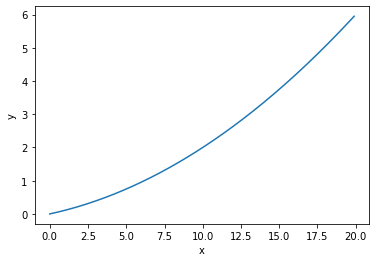

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0.0, 20.0, 0.1)
y=function_1(x)

plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y)
plt.show() 

In [17]:
# x=5일 때 미분
display(numerical_diff(function_1, 5))
# x=10일 때 미분
display(numerical_diff(function_1, 10) )

0.1999999999990898

0.2999999999986347

#### 앞의 수치 미분 값을 기울기로 하는 직선 & 위의 그래프

0.2999999999986347


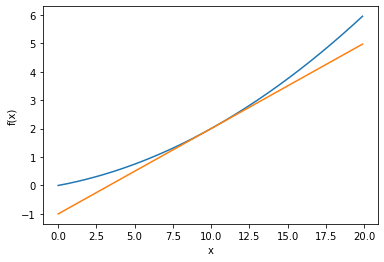

In [18]:
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 10)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show() 

### 편미분

In [19]:
def function_2(x):
    return x[0]**2 + x[1]**2
    # return np.sum(x**2) 
    
# x0^2 + x1^2 식 반환

In [20]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0
 
numerical_diff(function_tmp1, 3.0)
# x0=3, x1=4일 때 x0에 대한 편미분

6.00000000000378

In [21]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0) 
# x0=3, x1=4일 때 x1에 대한 편미분

7.999999999999119

### 기울기

In [41]:
def numerical_gradient(f, x):
    h=1e-4
    grad=np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val=x[idx]
        # f(x+h)
        x[idx]=tmp_val+h
        fxh1=f(x)
        
        # f(x-h)
        x[idx]=tmp_val-h
        fxh2=f(x)
        
        grad[idx]=(fxh1-fxh2)/(2*h)
        x[idx]=tmp_val
    
    return grad

In [42]:
numerical_gradient(function_2, np.array([3.0, 4.0])) 
# 각각 편미분한 값을 벡터로 반환 = 기울기 반환

array([6., 8.])

In [24]:
numerical_gradient(function_2, np.array([0.0, 2.0])) 

array([0., 4.])

In [25]:
numerical_gradient(function_2, np.array([3.0, 0.0])) 

array([6., 0.])

#### 기울기에 - 붙인 벡터 그리기

No handles with labels found to put in legend.


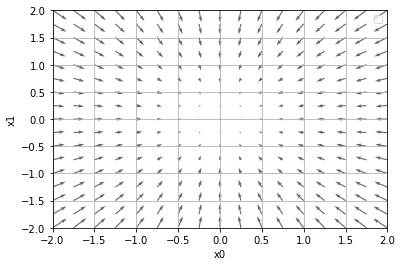

In [26]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show() 
    
# 각 점에서 함수의 출력 값을 가장 크게 줄이는 방향을 가리킴

### 경사하강법

In [43]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x=init_x
    
    for i in range(step_num):
        grad=numerical_gradient(f, x)
        x -= lr*grad
    return x

In [44]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x=np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100) 

array([-6.11110793e-10,  8.14814391e-10])

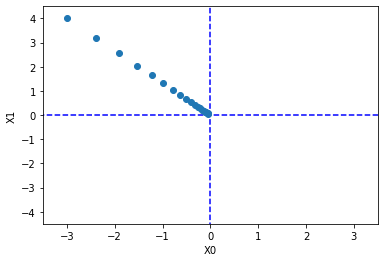

In [45]:
import numpy as np
import matplotlib.pylab as plt


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show() 

In [48]:
# 학습률 10으로 너무 큼 > 큰 값으로 발산
init_x=np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100) 

(array([-2.58983747e+13, -1.29524862e+12]),
 array([[-3.00000000e+00,  4.00000000e+00],
        [ 5.70000000e+01, -7.60000000e+01],
        [-1.08300000e+03,  1.44400000e+03],
        [ 2.05770000e+04, -2.74360000e+04],
        [-3.90963008e+05,  5.21284002e+05],
        [ 7.42829664e+06, -9.90439654e+06],
        [-1.41137328e+08,  1.88183103e+08],
        [ 2.68126267e+09, -3.57501690e+09],
        [-5.09763373e+10,  6.79001831e+10],
        [ 9.45170863e+11, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.29524862e+12],
        [-2.58983747e+13, -1.295

In [49]:
# 학습률 1e-10으로 너무 작음 > x가 거의 갱신되지 않은 채 끝남
init_x=np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)  

(array([-2.99999994,  3.99999992]),
 array([[-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  4.        ],
        [-3.        ,  3.99999999],
        [-3.        ,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999999],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999999,  3.99999998],
        [-2.99999998,  3.99999998],
        [-2.99999998,  3.999

#### 신경망에서 기울기

In [51]:
import sys, os
sys.path.append(os.pardir)
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x) #np.dot(x, self.W)
        y = softmax(z) # 확률 반환
        loss = cross_entropy_error(y, t)

        return loss

In [52]:
net=simpleNet()
print(net.W) # 가중치 매개변수

[[ 1.03422813  0.63177137 -1.13688304]
 [-0.85560542 -0.37267322  0.73724684]]


In [53]:
x=np.array([0.6, 0.9]) 
p=net.predict(x) # np.dot(x, W)
print(p) 

[-0.149508    0.04365693 -0.01860767]


In [54]:
np.argmax(p) # p 최대값 index

1

In [55]:
t=np.array([0, 0, 1])
net.loss(x, t) # 교차 엔트로피 오차 계산

1.0789360614685262

In [56]:
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

net = simpleNet()

f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print(dW)

[[ 0.44477805  0.11605169 -0.56082974]
 [ 0.66716708  0.17407753 -0.84124461]]


### 4.5 학습 알고리즘 구현
-  미니배치
-  기울기 산출
-  매개변수 갱신
-  위 3개 반복

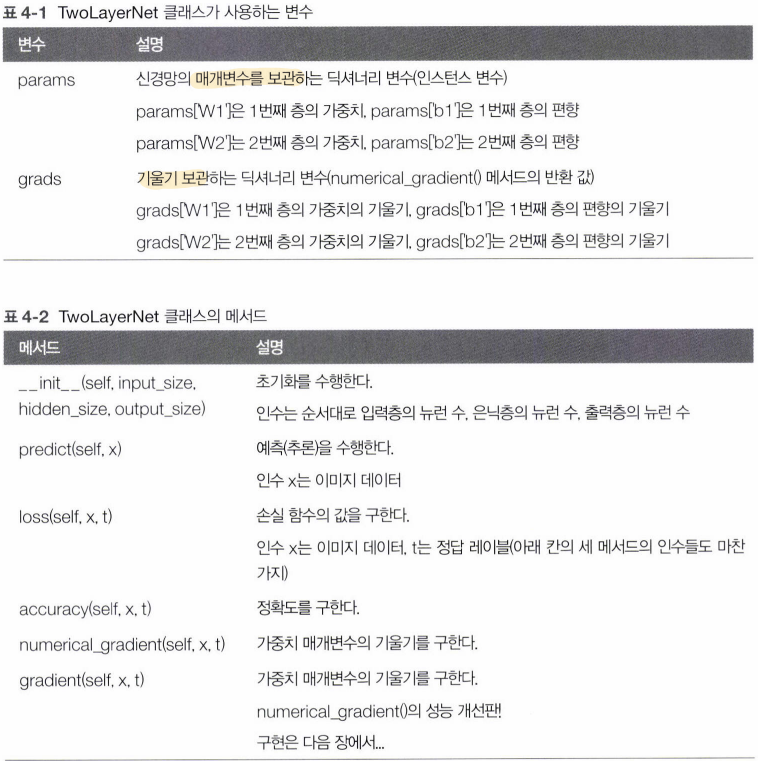

In [62]:
from IPython.display import Image
Image("TwoLayerNet 메서드.png")

In [65]:
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)
        
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads


In [66]:
net=TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape) 

(784, 100)
(100,)
(100, 10)
(10,)


In [67]:
x=np.random.rand(100, 784) # 100장 분량의 더미 데이터 입력
y=net.predict(x) 

In [68]:
x=np.random.rand(100, 784)
t=np.random.rand(100, 10)

grads=net.gradient(x, t)

print(grads['W1'].shape)
print(grads['b1'].shape)
print(grads['W2'].shape)
print(grads['b2'].shape) 

(784, 100)
(100,)
(100, 10)
(10,)


#### 미니배치 학습 구현

In [72]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list=[]

# 하이퍼 파라미터
iters_num=10000
train_size=x_train.shape[0]
batch_size=100
learning_rate=0.1

network=TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
    batch_mask=np.random.choice(train_size, batch_size)
    x_batch=x_train[batch_mask]
    t_batch=t_train[batch_mask]
    
    grad=network.gradient(x_batch, t_batch)
    
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key]-=learning_rate*grad[key]
        
    loss=network.loss(x_batch, t_batch)
    train_loss_list.append(loss) 

#### 4.5.3 시험 데이터로 평가

train acc, test acc | 0.1006, 0.1014
train acc, test acc | 0.7819, 0.7879
train acc, test acc | 0.87575, 0.8786
train acc, test acc | 0.89665, 0.9014
train acc, test acc | 0.9086666666666666, 0.9104
train acc, test acc | 0.9141166666666667, 0.9144
train acc, test acc | 0.9182166666666667, 0.9193
train acc, test acc | 0.92275, 0.9236
train acc, test acc | 0.9259833333333334, 0.9292
train acc, test acc | 0.9290666666666667, 0.9307
train acc, test acc | 0.9316166666666666, 0.9343
train acc, test acc | 0.9355166666666667, 0.9364
train acc, test acc | 0.9376833333333333, 0.9387
train acc, test acc | 0.94005, 0.9396
train acc, test acc | 0.9416166666666667, 0.9414
train acc, test acc | 0.9441833333333334, 0.9425
train acc, test acc | 0.9453333333333334, 0.9443


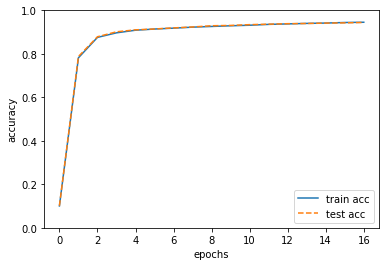

In [73]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()